# <span style="color:blue">  Esercitazione 3</span>

## Esercizio 3.1

In questo esercizio, si valutano i prezzi al tempo $t=0$ per le opzioni di tipo "call" e "put" nell'ambito delle opzioni europee, basandosi sul profitto calcolato al tempo $t=T$. I parametri considerati includono il prezzo dell'asset ($S(0)=100$), il tempo di consegna ($T=1$), il prezzo di esercizio ($K=100$), il tasso di interesse ($r=0.1$) e la volatilità ($\sigma=0.25$).

In particolare, il prezzo dell'opzione $S(t)$ segue un moto browniano geometrico $GBM(\mu,\sigma^2)$. Al tempo $t=T$ questo viene calcolato utilizzando due metodi distinti:

- calcolo diretto di $S(T)$: si utilizza la formula
  $$ S(t) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right] $$
  dove $W(t)\sim\mathcal{N}(0,t)$ è distribuito normalmente.
- Calcolo di $S(T)$ con step temporali: si procede attraverso 100 step temporali $t_1 < t_2 < \dots < t_n$, utilizzando la formula
  $$ S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right] $$
  dove $Z_i \sim \mathcal{N}(0,1)$.

I prezzi delle opzioni "call" e "put" al tempo $t=0$ sono dati rispettivamente da:
$$ C[S(0),0] = e^{-rT}\text{max}(0,S(T)-K) $$
$$ P[S(0),0] = e^{-rT}\text{max}(0, K-S(T)) $$

Questi valori sono calcolati utilizzando il metodo della media a blocchi su un totale di $10^5$ simulazioni. Infine, i risultati ottenuti sono confrontati con i valori attesi dalla soluzione analitica di Black-Scholes, che prevede $C_{BS} = 14.97579$ e $P_{BS} = 5.45953$.

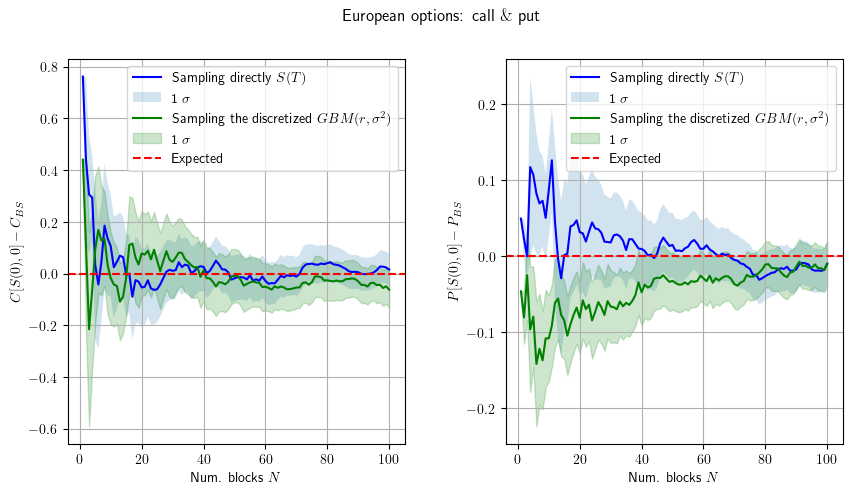

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Carica dati
data1 = np.loadtxt("Results_ex_3_1_1_call.out", skiprows=1)
data2 = np.loadtxt("Results_ex_3_1_2_call.out", skiprows=1)
data3 = np.loadtxt("Results_ex_3_1_1_put.out", skiprows=1)
data4 = np.loadtxt("Results_ex_3_1_2_put.out", skiprows=1)

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('European options: call $\\&$ put')

# Grafico di sinistra: opzione call
plt.subplot(1,2,1)
# Calcolo diretto di S(T)
plt.plot(data1[:,0], data1[:,1], color='blue', label='Sampling directly $S(T)$')
plt.fill_between(data1[:,0], data1[:,1]-data1[:,2], data1[:,1]+data1[:,2], alpha=0.2, label='1 $\\sigma$')
# Calcolo per step di S(T)
plt.plot(data2[:,0], data2[:,1], color='green', label='Sampling the discretized $GBM(r,\\sigma^2)$')
plt.fill_between(data2[:,0], data2[:,1]-data2[:,2], data2[:,1]+data2[:,2], color='green', alpha=0.2, label='1 $\\sigma$')
# Valore atteso
plt.axhline(0, color='red', linestyle='--', label='Expected')

plt.xlabel('Num. blocks $N$')
plt.ylabel('$C[S(0),0] - C_{BS}$')
plt.legend()
plt.grid(True)

# Grafico di destra: opzione put
plt.subplot(1,2,2)
# Calcolo diretto di S(T)
plt.plot(data3[:,0], data3[:,1], color='blue', label='Sampling directly $S(T)$')
plt.fill_between(data3[:,0], data3[:,1]-data3[:,2], data3[:,1]+data3[:,2], alpha=0.2, label='1 $\\sigma$')
# Calcolo per step di S(T)
plt.plot(data4[:,0], data4[:,1], color='green', label='Sampling the discretized $GBM(r,\\sigma^2)$')
plt.fill_between(data4[:,0], data4[:,1]-data4[:,2], data4[:,1]+data4[:,2], color='green', alpha=0.2, label='1 $\\sigma$')
# Valore atteso
plt.axhline(0, color='red', linestyle='--', label='Expected')

plt.xlabel('Num. blocks $N$')
plt.ylabel('$P[S(0),0] - P_{BS}$')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()